# Mod 1 Code Challenge: Pokemon Items

In this version of the solution, the filtering, calculating, ordering, limiting to top 7 are all done in SQL

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [2]:
conn = sqlite3.connect("pokemon.db")

In [3]:
sql_query = """
SELECT *, fling_power / cost AS power_per_cost FROM items
WHERE fling_power IS NOT NULL
ORDER BY power_per_cost DESC
LIMIT 7;
"""

In [4]:
top_7_items = pd.read_sql(sql_query, conn)

In [5]:
conn.close()

## Exploratory Data Analysis

In [6]:
top_7_items

,name,cost,fling_power,category,image_url,api_id,power_per_cost
0,cheri-berry,20,10.0,medicine,https://raw.githubusercontent.com/PokeAPI/spri...,126,0.500000
1,poison-barb,1000,70.0,type-enhancement,https://raw.githubusercontent.com/PokeAPI/spri...,222,0.070000
2,deep-sea-tooth,2000,90.0,species-specific,https://raw.githubusercontent.com/PokeAPI/spri...,203,0.045000
3,super-potion,700,30.0,healing,https://raw.githubusercontent.com/PokeAPI/spri...,26,0.042857
4,super-repel,700,30.0,spelunking,https://raw.githubusercontent.com/PokeAPI/spri...,76,0.042857
5,oval-stone,2000,80.0,evolution,https://raw.githubusercontent.com/PokeAPI/spri...,110,0.040000
6,lucky-punch,1000,40.0,species-specific,https://raw.githubusercontent.com/PokeAPI/spri...,233,0.040000


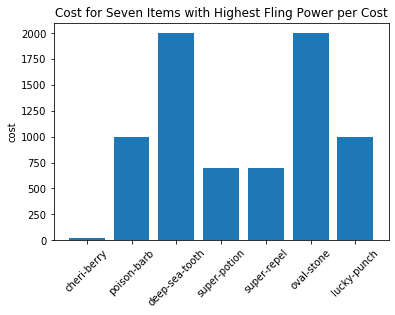

In [7]:
fig, ax = plt.subplots()
plt.xticks(rotation=45)

ax.bar(top_7_items["name"], top_7_items["cost"])
ax.set_ylabel("cost")
ax.set_title("Cost for Seven Items with Highest Fling Power per Cost");

## Decision Support

I choose the `cheri-berry` item because it has the highest `power_per_cost` and also has a significantly lower cost than the other items with high `power_per_cost`.  The bar chart helps to show how much lower the cost of this item (20) is than the cost of the others (700 or more).

## Additional Data Collection

In [8]:
URL = "https://pokeapi.co/api/v2/item/126"

In [9]:
response = requests.get(URL)
response

<Response [200]>

In [10]:
response_json = response.json()

In [11]:
response_json['fling_effect']

{'name': 'berry-effect',
 'url': 'https://pokeapi.co/api/v2/item-fling-effect/3/'}

The fling effect of my chosen item is a berry effect

## Bonus

In [12]:
item_effect_response = requests.get(response_json['fling_effect']['url'])
item_effect_response

<Response [200]>

In [13]:
item_effect_response_json = item_effect_response.json()
item_effect_response_json

{'effect_entries': [{'effect': "Immediately activates the berry's effect on the target.",
   'language': {'name': 'en',
    'url': 'https://pokeapi.co/api/v2/language/9/'}}],
 'id': 3,
 'items': [{'name': 'cheri-berry',
   'url': 'https://pokeapi.co/api/v2/item/126/'},
  {'name': 'chesto-berry', 'url': 'https://pokeapi.co/api/v2/item/127/'},
  {'name': 'pecha-berry', 'url': 'https://pokeapi.co/api/v2/item/128/'},
  {'name': 'rawst-berry', 'url': 'https://pokeapi.co/api/v2/item/129/'},
  {'name': 'aspear-berry', 'url': 'https://pokeapi.co/api/v2/item/130/'},
  {'name': 'leppa-berry', 'url': 'https://pokeapi.co/api/v2/item/131/'},
  {'name': 'oran-berry', 'url': 'https://pokeapi.co/api/v2/item/132/'},
  {'name': 'persim-berry', 'url': 'https://pokeapi.co/api/v2/item/133/'},
  {'name': 'lum-berry', 'url': 'https://pokeapi.co/api/v2/item/134/'},
  {'name': 'sitrus-berry', 'url': 'https://pokeapi.co/api/v2/item/135/'},
  {'name': 'figy-berry', 'url': 'https://pokeapi.co/api/v2/item/136/'},


In [14]:
item_effect_response_json['effect_entries'][0]

{'effect': "Immediately activates the berry's effect on the target.",
 'language': {'name': 'en', 'url': 'https://pokeapi.co/api/v2/language/9/'}}

In [15]:
item_effect_response_json['effect_entries'][0]['effect']

"Immediately activates the berry's effect on the target."